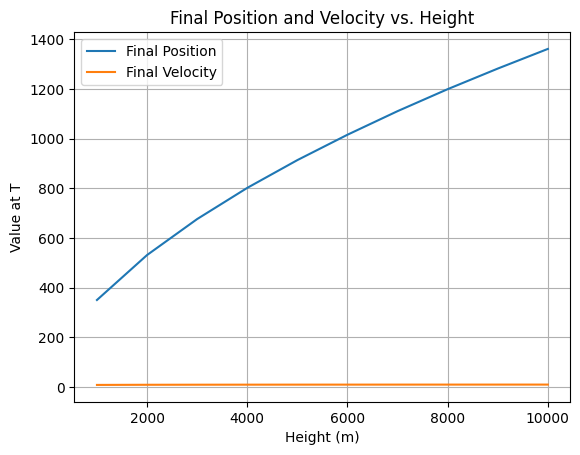

In [18]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
m = 70
Cd = 1.75
r = 1.225
A = 27
b = 1.77
w = 10
h = 0.1
heights = np.linspace(1000, 10000, 10)

def f(v):
    return (b * w - b * v) / m

def runge_kutta(x, v, h):
    l1 =  v
    k1v =  f(v)

    l2 = (v + 0.5 * k1v*h)
    k2v = f(v + 0.5 * k1v*h)

    l3 = (v + 0.5 * k2v*h)
    k3v = f(v + 0.5 * k2v*h)

    l4 =  (v + k3v*h)
    k4v =  f(v + k3v*h)

    x_new = x + h*(l1 + 2*l2 + 2*l3 + l4) / 6
    v_new = v + h*(k1v + 2 * k2v + 2 * k3v + k4v) / 6
    return x_new, v_new

def simulate(height):
    T = np.sqrt((2 * height * m) / (Cd * r * A))
    num_steps = int(T / h)

    t_values = np.zeros(num_steps + 1)
    x_values = np.zeros(num_steps + 1)
    v_values = np.zeros(num_steps + 1)

    x = 0
    v = 5
    t = 0

    for i in range(num_steps + 1):
        t_values[i] = t
        x_values[i] = x
        v_values[i] = v

        x, v = runge_kutta(x, v, h)
        t += h

    return t_values, x_values, v_values

final_positions = []
final_velocities = []

for height in heights:
    t_values, x_values, v_values = simulate(height)
    final_positions.append(x_values[-1])
    final_velocities.append(v_values[-1])

# Plot the results
plt.figure()
plt.plot(heights, final_positions, label='Final Position')
plt.plot(heights, final_velocities, label='Final Velocity')
plt.xlabel('Height (m)')
plt.ylabel('Value at T')
plt.legend()
plt.title('Final Position and Velocity vs. Height')
plt.grid(True)
plt.show()